<a href="https://colab.research.google.com/github/priyanka10111/Count-Down/blob/main/SalesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.colors as colors
pio.templates.default = "plotly_white"

In [3]:
import os
os.listdir('/content/drive/My Drive/')


['Colab Notebooks',
 'superstore_sales.xlsx',
 'Sales Data.csv',
 'Updated_sales.csv',
 'sales_data2.xlsx']

In [4]:
import pandas as pd
df = pd.read_excel('/content/drive/My Drive/superstore_sales.xlsx')

# Display the first few rows of the DataFrame
print(df.head())


          order_id order_date  ship_date       ship_mode    customer_name  \
0     AG-2011-2040 2011-01-01 2011-01-06  Standard Class  Toby Braunhardt   
1    IN-2011-47883 2011-01-01 2011-01-08  Standard Class      Joseph Holt   
2     HU-2011-1220 2011-01-01 2011-01-05    Second Class    Annie Thurman   
3  IT-2011-3647632 2011-01-01 2011-01-05    Second Class     Eugene Moren   
4    IN-2011-47883 2011-01-01 2011-01-08  Standard Class      Joseph Holt   

       segment            state    country  market   region  ...  \
0     Consumer      Constantine    Algeria  Africa   Africa  ...   
1     Consumer  New South Wales  Australia    APAC  Oceania  ...   
2     Consumer         Budapest    Hungary    EMEA     EMEA  ...   
3  Home Office        Stockholm     Sweden      EU    North  ...   
4     Consumer  New South Wales  Australia    APAC  Oceania  ...   

          category sub_category                 product_name    sales  \
0  Office Supplies      Storage          Tenex Lockers,

In [5]:
import os

# List the files in the current directory
print(os.listdir())


['.config', 'drive', 'sample_data']


In [6]:
df.tail()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.890,Medium,2014
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.490,Medium,2014
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.350,Medium,2014
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.199,Medium,2014
51289,CA-2014-156720,2014-12-31,2015-01-04,Standard Class,Jill Matthias,Consumer,Colorado,United States,US,West,...,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048,0.170,Medium,2014


In [7]:
df.shape

(51290, 21)

In [8]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [9]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [10]:
df.isna().sum()

,0
order_id,0
order_date,0
ship_date,0
ship_mode,0
customer_name,0
segment,0
state,0
country,0
market,0
region,0


In [11]:
 df.describe().round()

,order_date,ship_date,sales,quantity,discount,profit,shipping_cost,year
count,51290,51290,51290.0,51290.0,51290.0,51290.0,51290.0,51290.0
mean,2013-05-11 21:26:49.155780864,2013-05-15 20:42:42.745174528,246.0,3.0,0.0,29.0,26.0,2013.0
min,2011-01-01 00:00:00,2011-01-03 00:00:00,0.0,1.0,0.0,-6600.0,0.0,2011.0
25%,2012-06-19 00:00:00,2012-06-23 00:00:00,31.0,2.0,0.0,0.0,3.0,2012.0
50%,2013-07-08 00:00:00,2013-07-12 00:00:00,85.0,3.0,0.0,9.0,8.0,2013.0
75%,2014-05-22 00:00:00,2014-05-26 00:00:00,251.0,5.0,0.0,37.0,24.0,2014.0
max,2014-12-31 00:00:00,2015-01-07 00:00:00,22638.0,14.0,1.0,8400.0,934.0,2014.0
std,NaN,NaN,488.0,2.0,0.0,174.0,57.0,1.0


In [12]:
 # Getting month year from order_date
 df['month_year'] = df['order_date'].apply(lambda x: x.strftime('%Y-%m'))

In [13]:
 print(df['month_year'].unique())
 print(df['month_year'].dtype)

['2011-01' '2011-02' '2011-03' '2011-04' '2011-05' '2011-06' '2011-07'
 '2011-08' '2011-09' '2011-10' '2011-11' '2011-12' '2012-01' '2012-02'
 '2012-03' '2012-04' '2012-05' '2012-06' '2012-07' '2012-08' '2012-09'
 '2012-10' '2012-11' '2012-12' '2013-01' '2013-02' '2013-03' '2013-04'
 '2013-05' '2013-06' '2013-07' '2013-08' '2013-09' '2013-10' '2013-11'
 '2013-12' '2014-01' '2014-02' '2014-03' '2014-04' '2014-05' '2014-06'
 '2014-07' '2014-08' '2014-09' '2014-10' '2014-11' '2014-12']
object


In [14]:
# Group by 'month_year' and sum 'sales'
df_temp = df.groupby('month_year')['sales'].sum().reset_index()

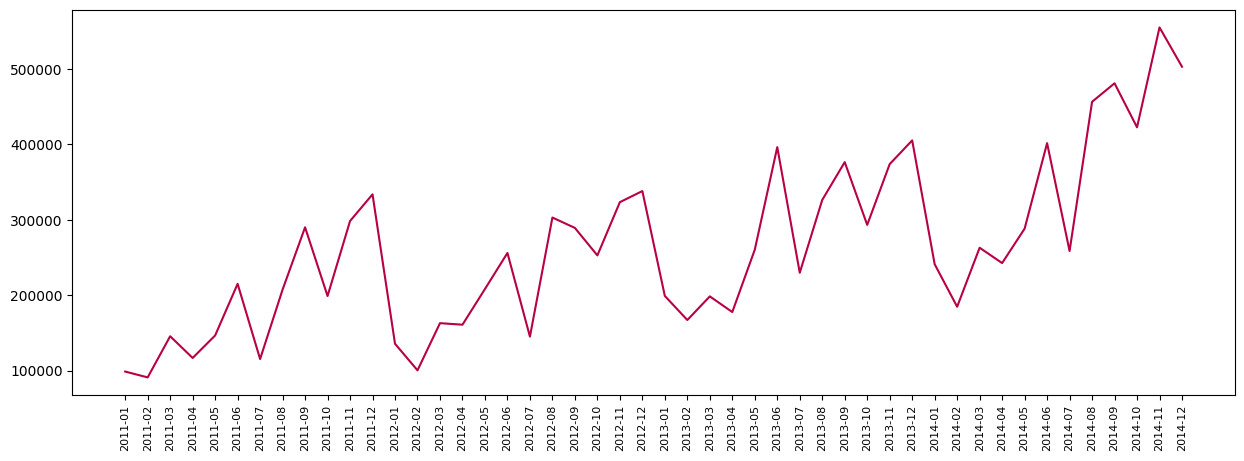

In [15]:
 # Setting the figure size
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.plot(df_temp['month_year'], df_temp['sales'], color='#b80045')
plt.xticks(rotation='vertical', size=8)
plt.show()

In [16]:
import plotly.express as px
sales_by_category = df.groupby('category')['sales'].sum().reset_index()
fig = px.pie(sales_by_category,
values='sales',
names='category',
hole= 0.5,
color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text='Sales Analysis by Category',
title_font=dict(size=24))
fig.show()

In [17]:
import plotly.express as px
sales_by_subcategory = df.groupby('sub_category')['sales'].sum().reset_index()
fig = px.bar(sales_by_subcategory,
x='sub_category',
y='sales',
title='Sales Analysis by Sub-Category')
fig.show()

In [18]:
import plotly.express as px
profit_by_month = df.groupby('month_year')['profit'].sum().reset_index()
fig = px.line(profit_by_month , x='month_year' , y='profit' , title='Sales Analysis by Sub-Category')
fig.show();


In [19]:
import plotly.express as px
profit_by_category = df.groupby('category')['profit'].sum().reset_index()
fig = px.pie(profit_by_category ,
             values = 'profit' ,
             names = 'category' ,
             hole = 0.5,
             color_discrete_sequence= px.colors.qualitative.Pastel)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title = 'Profit Analysis by Category',
                  title_font = dict(size=24))
fig.show()

In [20]:
profit_by_subcategory = df.groupby('sub_category')['profit'].sum().reset_index()
fig = px.bar(profit_by_subcategory, x='sub_category',
y='profit',
title='Profit Analysis by Sub-Category')
fig.show()


In [21]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

sales_profit_by_segment = df.groupby('segment').agg({'sales': 'sum', 'profit':'sum'}).reset_index()
color_palette = px.colors.qualitative.Pastel
fig = go.Figure()
fig.add_trace(go.Bar(x=sales_profit_by_segment['segment'],
y=sales_profit_by_segment['sales'],
name='Sales',
marker_color=color_palette[0]))
fig.add_trace(go.Bar(x=sales_profit_by_segment['segment'],
y=sales_profit_by_segment['profit'],
name='Profit',
marker_color=color_palette[1]))
fig.update_layout(title='Sales and Profit Analysis by Customer Segment',
xaxis_title='Customer Segment', yaxis_title='Amount')
fig.show()

In [22]:
sales_profit_by_segment = df.groupby('segment').agg({'sales' : 'sum' , 'profit' : 'sum'}).reset_index()
sales_profit_by_segment['sales_to_profit_ratio'] = sales_profit_by_segment['sales'] / sales_profit_by_segment['profit']
print(sales_profit_by_segment[['segment' , 'sales_to_profit_ratio']])

       segment  sales_to_profit_ratio
0     Consumer               8.686070
1    Corporate               8.637804
2  Home Office               8.338550


In [23]:
prod_sales = pd.DataFrame(df.groupby('product_name')['sales'].sum())
prod_sales.sort_values(by = ('sales') , inplace = True , ascending = False)
prod_sales[:10]

,sales
product_name,
"Apple Smart Phone, Full Size",86935.7786
"Cisco Smart Phone, Full Size",76441.5306
"Motorola Smart Phone, Full Size",73156.3030
"Nokia Smart Phone, Full Size",71904.5555
Canon imageCLASS 2200 Advanced Copier,61599.8240
"Hon Executive Leather Armchair, Adjustable",58193.4841
"Office Star Executive Leather Armchair, Adjustable",50661.6840
"Harbour Creations Executive Leather Armchair, Adjustable",50121.5160
"Samsung Smart Phone, Cordless",48653.4600


In [24]:
best_selling_prod = pd.DataFrame(df.groupby('product_name')['quantity'].sum())
best_selling_prod.sort_values(by = ['quantity'] , inplace = True , ascending = False)
best_selling_prod[:10]

,quantity
product_name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259
"Stockwell Paper Clips, Assorted Sizes",253
"Avery Index Tab, Clear",252
"Ibico Index Tab, Clear",251
"Smead File Cart, Single Width",250


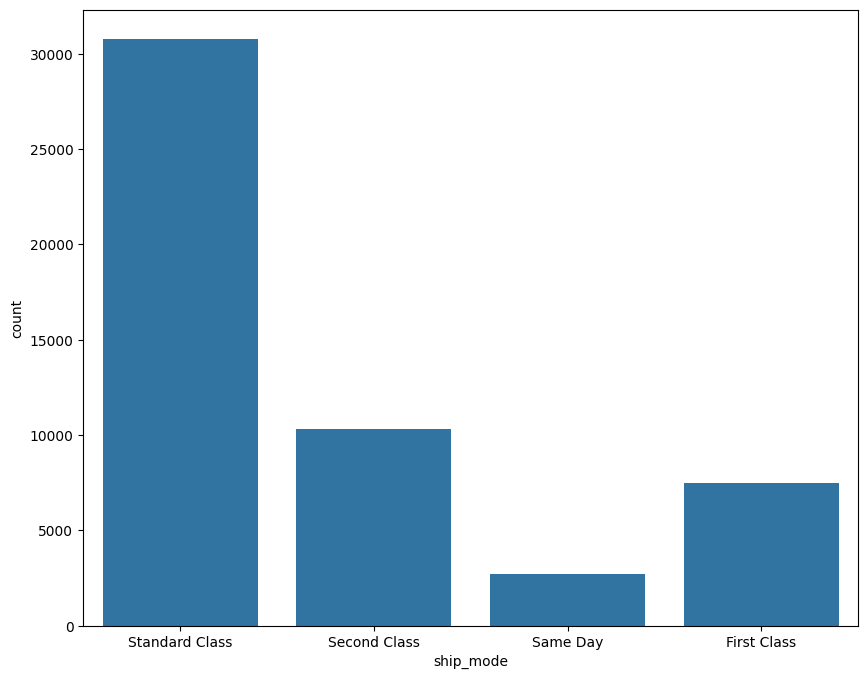

In [25]:
plt.figure(figsize=(10 , 8))
sns.countplot(x='ship_mode' , data = df)
plt.show()

In [26]:
cat_subcat = pd.DataFrame(df.groupby(['category' , 'sub_category']) ['profit'].sum())
cat_subcat.sort_values(['category' , 'sub_category'] , ascending = False)
cat_subcat[:10]

profit
category        sub_category             
Furniture       Bookcases     161924.4195
                Chairs        141973.7975
                Furnishings    46967.4255
                Tables        -64083.3887
Office Supplies Appliances    141680.5894
                Art            57953.9109
                Binders        72449.8460
                Envelopes      29601.1163
                Fasteners      11525.4241
                Labels         15010.5120

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
file_path = '/content/drive/My Drive/your_filename.csv'
import pandas as pd

# Replace the path with the actual path to your CSV file
all_data = pd.read_csv('/content/drive/My Drive/Updated_sales.csv')

# Display the first few rows of the DataFrame
print(all_data.head())


  Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
1      NaN                         NaN              NaN        NaN   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001  
1             NaN                                   NaN  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  


In [29]:
df_isNan = all_data[all_data.isna().any(axis = 1)]
print(df_isNan)

      Order ID Product Quantity Ordered Price Each Order Date Purchase Address
1          NaN     NaN              NaN        NaN        NaN              NaN
356        NaN     NaN              NaN        NaN        NaN              NaN
735        NaN     NaN              NaN        NaN        NaN              NaN
1433       NaN     NaN              NaN        NaN        NaN              NaN
1553       NaN     NaN              NaN        NaN        NaN              NaN
...        ...     ...              ...        ...        ...              ...
28132      NaN     NaN              NaN        NaN        NaN              NaN
28879      NaN     NaN              NaN        NaN        NaN              NaN
29097      NaN     NaN              NaN        NaN        NaN              NaN
29247      NaN     NaN              NaN        NaN        NaN              NaN
29257      NaN     NaN              NaN        NaN        NaN              NaN

[87 rows x 6 columns]


In [30]:
all_data = all_data.dropna()
print(all_data)

      Order ID                     Product Quantity Ordered Price Each  \
0       176558        USB-C Charging Cable                2      11.95   
2       176559  Bose SoundSport Headphones                1      99.99   
3       176560                Google Phone                1        600   
4       176560            Wired Headphones                1      11.99   
5       176561            Wired Headphones                1      11.99   
...        ...                         ...              ...        ...   
30389   248146  Bose SoundSport Headphones                1      99.99   
30390   248147      AAA Batteries (4-pack)                3       2.99   
30391   248148       AA Batteries (4-pack)                1       3.84   
30392   248149        USB-C Charging Cable                1      11.95   
30393   248150       AA Batteries (4-pack)                1       3.84   

           Order Date                         Purchase Address  
0      04/19/19 08:46             917 1st St, 

In [31]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
print(all_data)

      Order ID                     Product Quantity Ordered Price Each  \
0       176558        USB-C Charging Cable                2      11.95   
2       176559  Bose SoundSport Headphones                1      99.99   
3       176560                Google Phone                1        600   
4       176560            Wired Headphones                1      11.99   
5       176561            Wired Headphones                1      11.99   
...        ...                         ...              ...        ...   
30389   248146  Bose SoundSport Headphones                1      99.99   
30390   248147      AAA Batteries (4-pack)                3       2.99   
30391   248148       AA Batteries (4-pack)                1       3.84   
30392   248149        USB-C Charging Cable                1      11.95   
30393   248150       AA Batteries (4-pack)                1       3.84   

           Order Date                         Purchase Address  
0      04/19/19 08:46             917 1st St, 

In [32]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30246 entries, 0 to 30393
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          30246 non-null  object
 1   Product           30246 non-null  object
 2   Quantity Ordered  30246 non-null  object
 3   Price Each        30246 non-null  object
 4   Order Date        30246 non-null  object
 5   Purchase Address  30246 non-null  object
dtypes: object(6)
memory usage: 1.6+ MB


In [33]:
 all_data.shape


(30246, 6)

In [34]:
 all_data.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,30246,30246,30246,30246,30246,30246
unique,29018,19,8,23,23315,27853
top,178158,Lightning Charging Cable,1,14.95,04/02/19 13:24,"821 Elm St, Austin, TX 73301"
freq,4,3556,27405,3556,7,4


In [35]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])


In [36]:
all_data['month'] = all_data['Order Date'].str[0:2]
all_data['month'] = all_data['month'].astype('int32')
print(all_data)

      Order ID                     Product  Quantity Ordered  Price Each  \
0       176558        USB-C Charging Cable                 2       11.95   
2       176559  Bose SoundSport Headphones                 1       99.99   
3       176560                Google Phone                 1      600.00   
4       176560            Wired Headphones                 1       11.99   
5       176561            Wired Headphones                 1       11.99   
...        ...                         ...               ...         ...   
30389   248146  Bose SoundSport Headphones                 1       99.99   
30390   248147      AAA Batteries (4-pack)                 3        2.99   
30391   248148       AA Batteries (4-pack)                 1        3.84   
30392   248149        USB-C Charging Cable                 1       11.95   
30393   248150       AA Batteries (4-pack)                 1        3.84   

           Order Date                         Purchase Address  month  
0      04/19/19

In [37]:
all_data['month'] = pd.to_datetime(all_data['Order Date']).dt.month
all_data.head()

<ipython-input-37-40fb72a73894>:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [38]:
def get_city(address):
   return address.split(",")[1].strip(" ")
def get_state(address):
    return address.split(",")[2].split(" ")[1]
all_data['city'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA)


In [39]:
 # Perform the calculation
 all_data['Sales'] = all_data['Quantity Ordered'].astype('int') *all_data['Price Each'].astype('float')

In [40]:
 # Group by 'Month' and sum the numeric columns
 monthly_sales = all_data.groupby('month').agg({'Quantity Ordered': 'sum','Price Each': 'sum', 'Sales': 'sum'})

In [41]:
 monthly_sales.head()

,Quantity Ordered,Price Each,Sales
month,,,
4,20539,3362503.59,3385499.82
5,29,10555.45,10559.29
8,13430,2228199.94,2242315.57
9,12,2096.74,2096.74


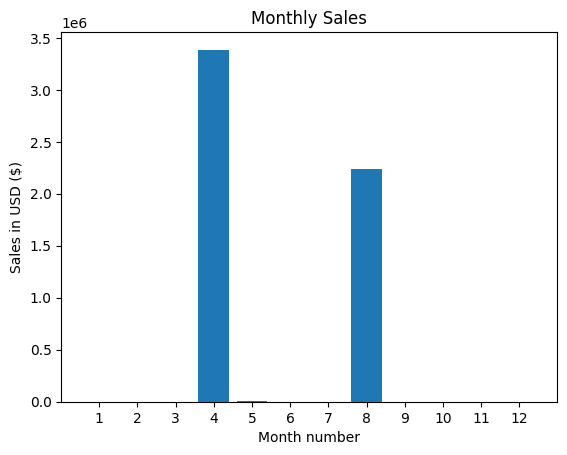

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range of months
months = range(1, 13)

# Group by month and sum sales, filling missing months with 0
sales_data = all_data.groupby(['month'])['Sales'].sum().reindex(months , fill_value = 0)

# Plot the data
plt.bar(months, sales_data)
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.title('Monthly Sales')
plt.show()



In [43]:
city_sales = all_data.groupby('city').agg({'Quantity Ordered' : 'sum' , 'Price Each' : 'sum' , 'Sales' : 'sum'})
city_sales.head()


,Quantity Ordered,Price Each,Sales
city,,,
Atlanta (GA),2686,451323.17,453722.58
Austin (TX),1827,296633.65,298397.20
Boston (MA),3599,589675.38,594155.41
Dallas (TX),2621,430647.33,432603.93
Los Angeles (CA),5471,891861.82,896860.73


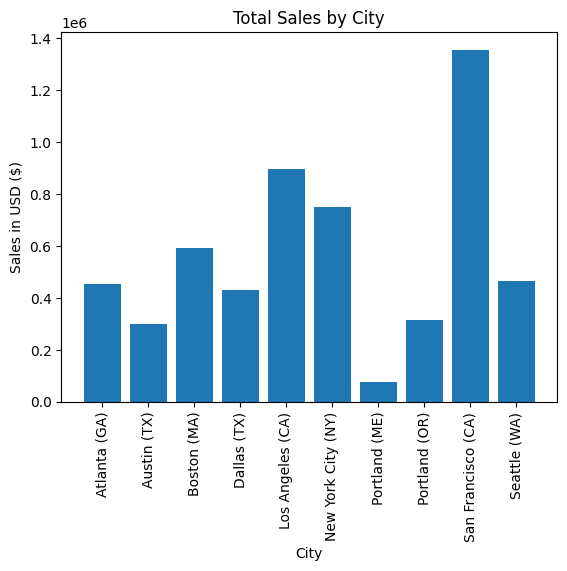

In [44]:
import numpy as np
import matplotlib.pyplot as plt

city_sales = all_data.groupby(['city'])['Sales'].sum()
plt.bar(city_sales.index , city_sales.values)
plt.xticks(rotation = 90)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City')
plt.title('Total Sales by City')
plt.show()


In [45]:
#What time should we display advertisements to maximize likelihood of customer’s buying product?
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data['count'] = 1
all_data.head()

<ipython-input-45-0ac23ed15e0f>:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

<ipython-input-45-0ac23ed15e0f>:3: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,city,Sales,Hour,minute,count
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99,22,30,1
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00,14,38,1
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,14,38,1
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,9,27,1


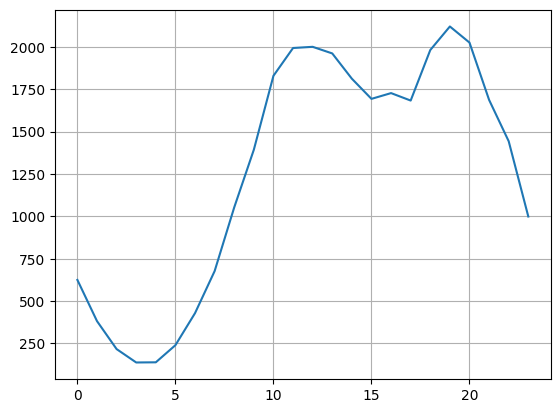

In [46]:
keys = [pair for pair, df in all_data.groupby(['Hour'])]
plt.plot(keys, all_data.groupby(['Hour']).count()['count'])
plt.grid()
plt.show()

In [47]:
# What products are most often sold together?
df = all_data[all_data['Order ID'].duplicated(keep =False)]
df['grouped'] = all_data.groupby(['Order ID'])['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID' , 'grouped']].drop_duplicates()


<ipython-input-47-6e2004581481>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [48]:
from itertools import combinations
from collections import Counter
count = Counter()
for row in df2['grouped']:
  row_list = row.split(',')
  count.update(Counter(combinations(row_list , 2)))
for key,value in count.most_common(10):
 print(key , value)

('iPhone', 'Lightning Charging Cable') 172
('Google Phone', 'USB-C Charging Cable') 167
('iPhone', 'Wired Headphones') 65
('Google Phone', 'Wired Headphones') 64
('iPhone', 'Apple Airpods Headphones') 63
('Vareebadd Phone', 'USB-C Charging Cable') 58
('Google Phone', 'Bose SoundSport Headphones') 36
('USB-C Charging Cable', 'Wired Headphones') 23
('Vareebadd Phone', 'Wired Headphones') 22
('Vareebadd Phone', 'Bose SoundSport Headphones') 17


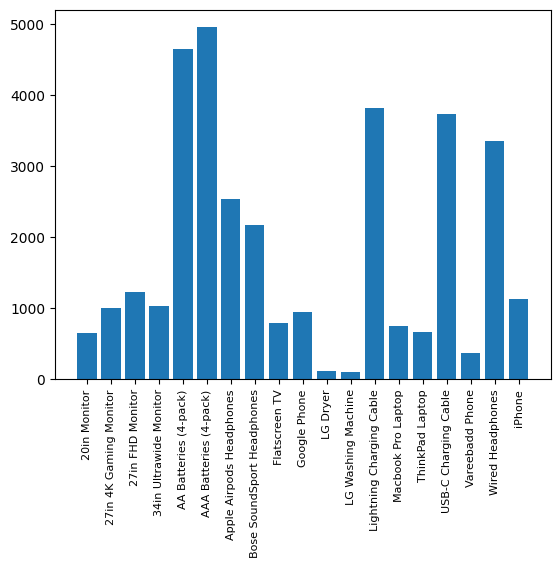

In [49]:
 product_group = all_data.groupby('Product')
 quantity_ordered = product_group.sum()['Quantity Ordered']
 keys = [pair for pair, df in product_group]
 plt.bar(keys, quantity_ordered)
 plt.xticks(keys, rotation='vertical', size=8)
 plt.show()

In [50]:
import pandas as pd
import os
df = pd.read_excel('/content/drive/My Drive/sales_data2.xlsx')
print(df)


           Date SalesRep Region   Product  Color  Units  Revenue
0    2015-11-06    Julie   East  Sunshine   Blue      4    78.80
1    2015-11-07     Adam   West    Bellen  Clear      4   123.00
2    2015-11-07    Julie   East     Aspen  Clear      1    26.00
3    2015-11-07    Nabil  South      Quad  Clear      2    69.00
4    2015-11-07    Julie  South     Aspen   Blue      2    51.00
...         ...      ...    ...       ...    ...    ...      ...
9966 2017-11-05    Nabil  South     Aspen  Clear      2    51.00
9967 2017-11-05    Julie   West     Aspen   Blue      3    66.00
9968 2017-11-05   Nicole   West    Bellen  Clear      3    71.85
9969 2017-11-05     Adam   West  Sunshine  Clear      3    62.85
9970 2017-11-05    Nabil  South    Bellen  Clear      1    25.95

[9971 rows x 7 columns]


In [51]:
df.head()

,Date,SalesRep,Region,Product,Color,Units,Revenue
0,2015-11-06,Julie,East,Sunshine,Blue,4,78.8
1,2015-11-07,Adam,West,Bellen,Clear,4,123.0
2,2015-11-07,Julie,East,Aspen,Clear,1,26.0
3,2015-11-07,Nabil,South,Quad,Clear,2,69.0
4,2015-11-07,Julie,South,Aspen,Blue,2,51.0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9971 entries, 0 to 9970
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      9971 non-null   datetime64[ns]
 1   SalesRep  9971 non-null   object        
 2   Region    9971 non-null   object        
 3   Product   9971 non-null   object        
 4   Color     9971 non-null   object        
 5   Units     9971 non-null   int64         
 6   Revenue   9971 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 545.4+ KB


In [53]:
df.describe()

,Date,Units,Revenue
count,9971,9971.000000,9971.000000
mean,2017-02-17 18:38:14.092869376,3.388828,91.181513
min,2015-11-06 00:00:00,1.000000,21.000000
25%,2016-09-25 00:00:00,2.000000,42.900000
50%,2016-11-26 00:00:00,2.000000,60.000000
75%,2017-09-25 00:00:00,3.000000,76.500000
max,2017-11-05 00:00:00,25.000000,1901.750000
std,NaN,4.320759,120.894473


In [54]:
df.isna().sum()

,0
Date,0
SalesRep,0
Region,0
Product,0
Color,0
Units,0
Revenue,0


<Axes: >

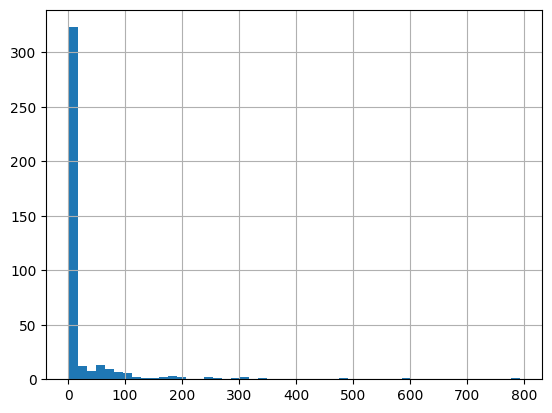

In [55]:
df['Revenue'].value_counts().hist(bins=50)

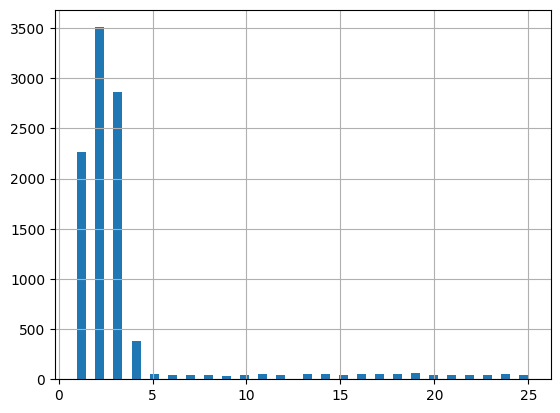

In [56]:
 df['Units'].hist(bins=50);

In [57]:
round(df['Revenue'].sum())

909171

In [58]:
region_revenue = pd.DataFrame(df.groupby(by =['Region'])['Revenue'].sum())
region_revenue.sort_values(ascending=False, by='Revenue')

,Revenue
Region,
West,408037.58
South,263256.50
East,237876.79


<Axes: title={'center': 'Region revenue impact'}, xlabel='Region', ylabel='Revenue'>

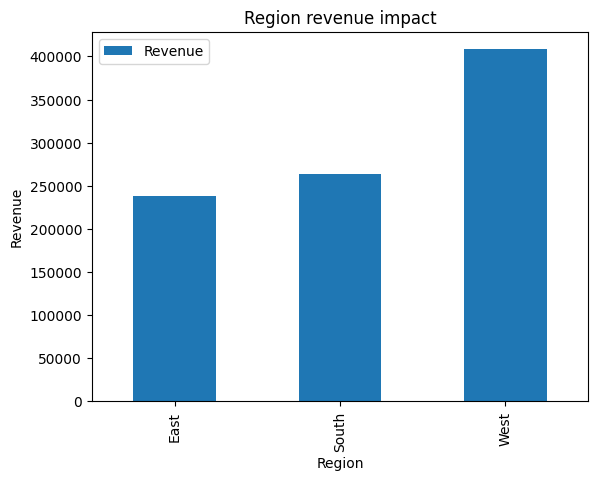

In [59]:
region_revenue.plot(kind = 'bar' , ylabel='Revenue', title='Region revenue impact')

In [60]:
sales_rep_revenue = df.groupby(['SalesRep'])['Revenue'].sum()
sales_rep_revenue = pd.DataFrame(sales_rep_revenue).sort_values(ascending = True , by = 'Revenue')
sales_rep_revenue

,Revenue
SalesRep,
Nicole,92026.68
Adam,102715.60
Jessica,145496.28
Nabil,158904.48
Julie,204450.05
Mike,205577.78


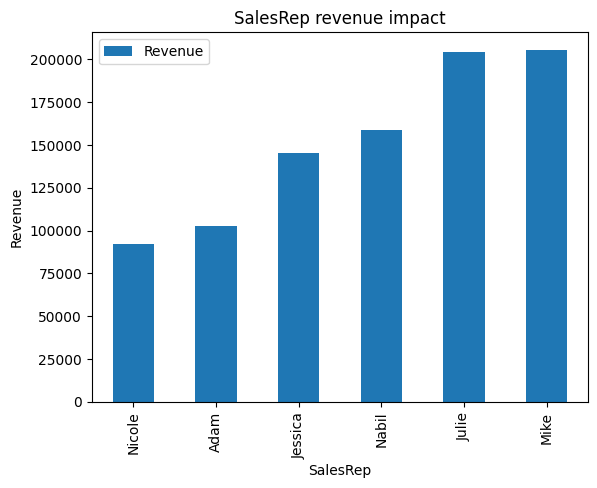

In [61]:
sales_rep_revenue.plot(kind='bar', ylabel='Revenue', title='SalesRep revenue impact');

In [62]:
product_revenue = df[['Units', 'Revenue','Product']].groupby('Product').sum().sort_values(ascending=False,by='Units')
product_revenue

,Units,Revenue
Product,,
Bellen,6579,168175.05
Quad,6223,194032.15
Sunbell,4498,114232.09
Carlota,4371,101272.05
Aspen,4242,96382.80
Sunshine,4229,85983.80
Doublers,3646,149041.93
Sunbell*,2,51.00


<Axes: title={'center': 'Product Revenue'}, xlabel='Product', ylabel='Revenue'>

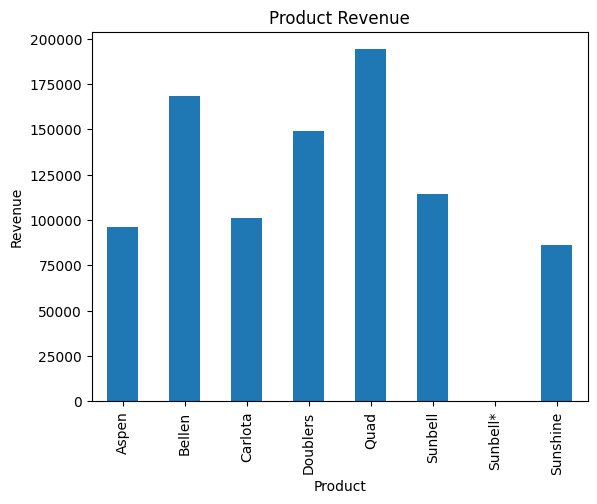

In [63]:
product_revenue.groupby(by=['Product'])['Revenue'].sum().plot(kind = 'bar' , ylabel = 'Revenue' , title = 'Product Revenue')

In [64]:
 # Convert the date column to a datetime object
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [65]:
years = [unique for unique in df.Year.unique()]
years

[2015, 2016, 2017]

In [66]:
def plot_trend(years:list, df):
 for year in years:
    new_df = df[df['Year'] == year]
    new_df.groupby('Date')['Revenue'].sum().plot(linewidth=1.3,
    ylabel='Revenue',
    xlabel='Date',
    title='Sales Trend')

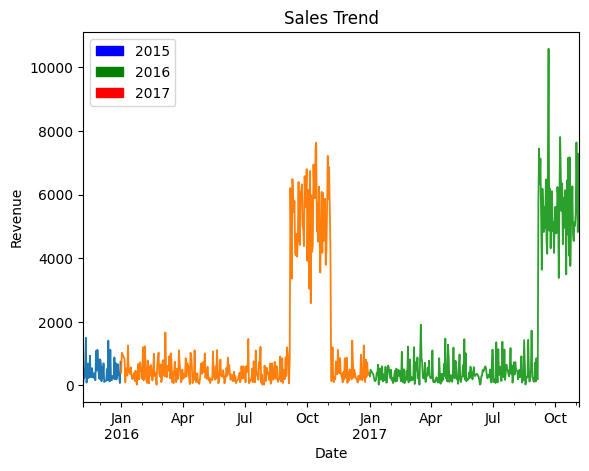

In [67]:
import matplotlib.patches as patches
year1 = patches.Patch(color='blue', label='2015')
year2 = patches.Patch(color='green', label='2016')
year3 = patches.Patch(color='red', label='2017')
plot_trend(years, df)
plt.legend(handles=[year1,year2,year3], loc=2);

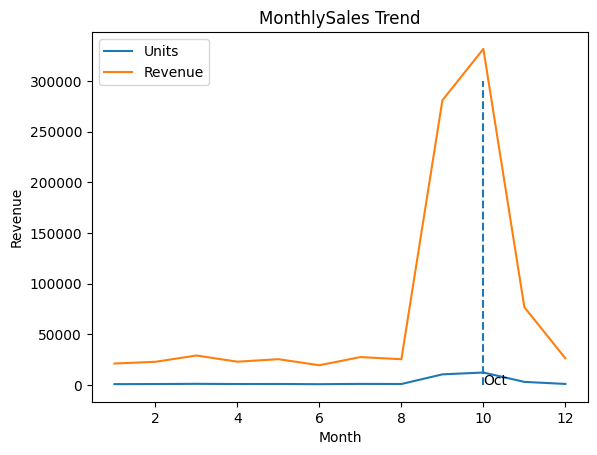

In [68]:
ax = df[['Month', 'Units', 'Revenue']].groupby('Month').sum().plot(
title='MonthlySales Trend',
ylabel='Revenue',
);
ax.vlines(10,1,300000, linestyles='dashed')
ax.annotate('Oct',(10,0));

<Axes: title={'center': 'Monthly Entries'}, xlabel='Month', ylabel='Number of Entries'>

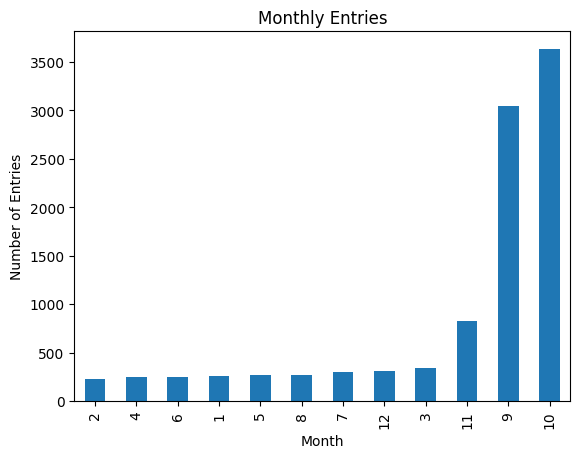

In [69]:
df['Month'].value_counts().sort_values().plot(kind = 'bar' , xlabel = 'Month' , ylabel = 'Number of Entries', title = 'Monthly Entries')

In [70]:
products = pd.DataFrame(df[['Units','Revenue','Product','Month', 'Region']].groupby('Month')['Product'].value_counts())
products

count
Month Product        
1     Bellen       52
      Quad         46
      Sunbell      34
      Aspen        33
      Sunshine     33
...               ...
12    Sunbell      43
      Aspen        41
      Sunshine     36
      Carlota      35
      Doublers     32

[85 rows x 1 columns]

In [71]:
products['No_of_products'] = products['count']
products = products.reset_index()

In [72]:
products.drop('count', inplace=True, axis=1)
products

,Month,Product,No_of_products
0,1,Bellen,52
1,1,Quad,46
2,1,Sunbell,34
3,1,Aspen,33
4,1,Sunshine,33
...,...,...,...
80,12,Sunbell,43
81,12,Aspen,41
82,12,Sunshine,36
83,12,Carlota,35


In [73]:
products = products.pivot_table(values =['No_of_products'] , index=['Month'], columns=['Product'], aggfunc= np.sum)
products

<ipython-input-73-ae6c77fb80ef>:1: FutureWarning:

The provided callable <function sum at 0x792c3c7cc0d0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



No_of_products                                                  \
Product          Aspen Bellen Carlota Doublers   Quad Sunbell Sunbell*   
Month                                                                    
1                 33.0   52.0    30.0     29.0   46.0    34.0      NaN   
2                 26.0   45.0    29.0     25.0   45.0    35.0      NaN   
3                 49.0   55.0    46.0     34.0   77.0    35.0      NaN   
4                 31.0   37.0    35.0     27.0   50.0    43.0      NaN   
5                 33.0   52.0    36.0     30.0   51.0    37.0      NaN   
6                 37.0   53.0    23.0     21.0   52.0    30.0      NaN   
7                 38.0   60.0    37.0     25.0   55.0    46.0      NaN   
8                 34.0   54.0    26.0     35.0   51.0    35.0      NaN   
9                380.0  596.0   399.0    311.0  560.0   397.0      NaN   
10               476.0  735.0   439.0    333.0  697.0   491.0      NaN   
11               119.0  154.0   118.0     77.0  142.0   107.0      1.0   
12                41.0   55.0    35.0     32.0   64.0    43.0      NaN   

                  
Product Sunshine  
Month             
1           33.0  
2           26.0  
3           39.0  
4           25.0  
5           31.0  
6           36.0  
7           42.0  
8           35.0  
9          404.0  
10         460.0  
11         103.0  
12          36.0

<Axes: title={'center': 'Monthly product sales'}, xlabel='Month', ylabel='No of Products sold'>

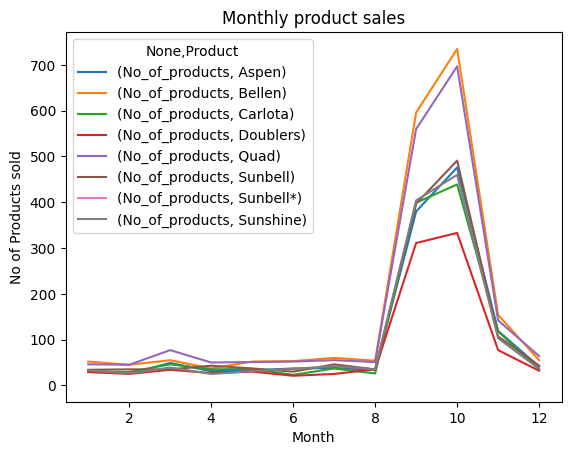

In [74]:
 products.plot(ylabel='No of Products sold', title='Monthly product sales')

In [75]:
region_sales = pd.DataFrame(df[['Units','Revenue','Product','Month','Region']]).groupby(['Month','Region'])['Revenue'].sum()
region_sales = pd.DataFrame(region_sales)
region_sales

Revenue
Month Region           
1     East      5012.34
      South     7551.55
      West      8550.33
2     East      6428.75
      South     5540.10
      West     10864.87
3     East      6082.75
      South     8863.80
      West     14087.99
4     East      6420.63
      South     7647.28
      West      8865.57
5     East      8782.68
      South     5651.30
      West     10962.00
6     East      6442.85
      South     3954.90
      West      9020.65
7     East      7180.45
      South    10155.59
      West     10150.25
8     East      6031.55
      South     7767.60
      West     11567.37
9     East     70532.44
      South    83228.39
      West    127160.06
10    East     87858.60
      South    92034.70
      West    151780.43
11    East     19478.10
      South    24048.59
      West     33196.52
12    East      7625.65
      South     6812.70
      West     11831.54

In [76]:
region_sales = region_sales.reset_index()
region_sales = region_sales.pivot_table(values =['Revenue'] , index = ['Month'] , columns = ['Region']  , aggfunc = np.sum)
region_sales

<ipython-input-76-b00c3a4efd42>:2: FutureWarning:

The provided callable <function sum at 0x792c3c7cc0d0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



Revenue                     
Region      East     South       West
Month                                
1        5012.34   7551.55    8550.33
2        6428.75   5540.10   10864.87
3        6082.75   8863.80   14087.99
4        6420.63   7647.28    8865.57
5        8782.68   5651.30   10962.00
6        6442.85   3954.90    9020.65
7        7180.45  10155.59   10150.25
8        6031.55   7767.60   11567.37
9       70532.44  83228.39  127160.06
10      87858.60  92034.70  151780.43
11      19478.10  24048.59   33196.52
12       7625.65   6812.70   11831.54

<Axes: title={'center': 'Monthly Revenue'}, xlabel='Month', ylabel='Revenue'>

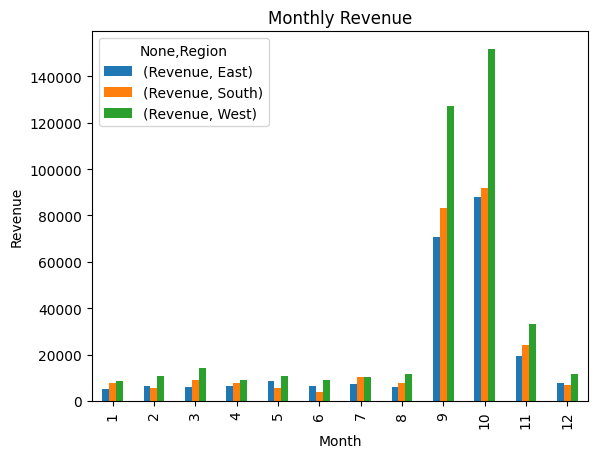

In [77]:
region_sales.plot(kind = 'bar' , ylabel = 'Revenue' , title = 'Monthly Revenue')

In [78]:
changes = pd.DataFrame(df.groupby([df.Date.dt.year])['Revenue'].sum())
changes

,Revenue
Date,
2015,24883.84
2016,444701.72
2017,439585.31


<Axes: xlabel='Date'>

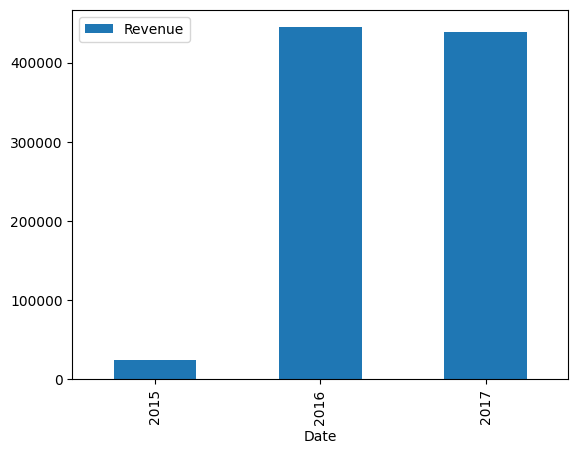

In [79]:
changes.sort_values('Date').plot(kind='bar')

In [80]:
product_revenue

,Units,Revenue
Product,,
Bellen,6579,168175.05
Quad,6223,194032.15
Sunbell,4498,114232.09
Carlota,4371,101272.05
Aspen,4242,96382.80
Sunshine,4229,85983.80
Doublers,3646,149041.93
Sunbell*,2,51.00


In [81]:
SalesRep = df[['SalesRep', 'Year', 'Revenue', 'Units']]
SalesRep = pd.DataFrame(SalesRep.groupby(['Year' , 'SalesRep'])['Revenue'].sum())
SalesRep.sort_values(by=['Year','Revenue'] , ascending = False)

Revenue
Year SalesRep           
2017 Julie      99727.32
     Mike       96062.19
     Nabil      81079.23
     Jessica    69479.74
     Adam       49712.19
     Nicole     43524.64
2016 Mike      104590.64
     Julie      98895.58
     Nabil      74576.22
     Jessica    71469.42
     Adam       49184.21
     Nicole     45985.65
2015 Julie       5827.15
     Mike        4924.95
     Jessica     4547.12
     Adam        3819.20
     Nabil       3249.03
     Nicole      2516.39